In [1]:
# GENERAL LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# OWN LIBRAIRY IMPORT
from basic_sl import synthetise

In [3]:
# DATA IMPORT
netflix = pd.read_csv('../data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,vote,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,rating_category
0,-1.565669,0.0,1.0,0.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,top_10pct
1,-1.565669,0.0,1.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,bottom_25pct
2,1.218334,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,bottom_25pct
3,0.174333,0.0,1.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,bottom_25pct
4,-1.565669,1.0,0.0,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,top_10pct


In [4]:
# SKLEARN IMPORTS
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [5]:
# DATA PREPARATION

X = netflix.drop('rating_category', axis = 1)
y = netflix.rating_category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
GaussianNB?

Init signature: GaussianNB(*, priors=None, var_smoothing=1e-09)
Docstring:     
Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training samples observed in each class.

class_prior_ : ndarray of shape (n_classes,)
    probabilit

In [7]:
# GAUSSIAN NB
## Naive view: default hyperparameters & all features
### Model fitting
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

GAUSSIAN NB
TRAIN dataset
Accuracy score: 56.7%
Recall score (macro): 57.4%
Precision score (macro): 51.3%
ROC_AUC score (macro): 74.7%
TEST dataset
Accuracy score: 57.5%
Recall score (macro): 56.5%
Precision score (macro): 50.8%
ROC_AUC score (macro): 72.8%




/Users/ericmartinet/Documents/GitHub/Project7_SupervisedLearningNetflix/notebook/basic_sl.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


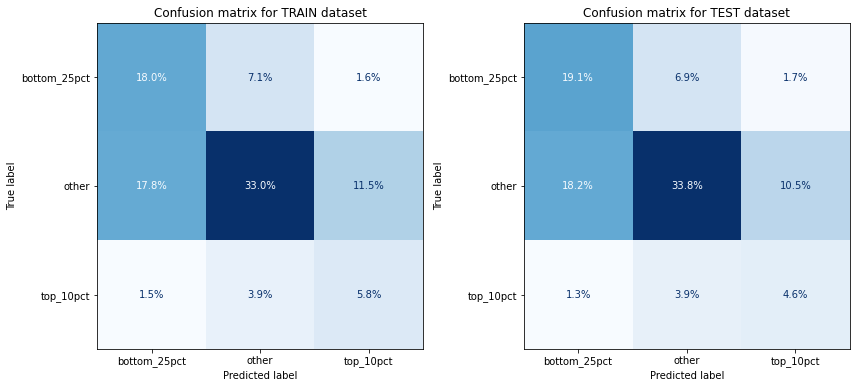

In [8]:
### Synthesis
synthetise(gnb, X_train, X_test, y_train, y_test)

In [9]:
### Conclusions
#### Medium scoring and no overfit.
#### Not a great model for our use case.